<a href="https://colab.research.google.com/github/rmarvel23/TwitterProject/blob/main/TwitterProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TWITTER PROJECT**

En este proyecto nos vamos a centrar en el análisis y uso de un Dataset en concreto que hemos obtenido de Kaggle. Este Dataset es un análisis de sentimientos de Tweets, por tanto, tiene columnas con el texto del Tweet, el momento del día en el que se publicó, el rango de edad del usuario, su nacionalidad y el sentimiento del mensaje, entre otras cosas.

A lo largo del proyecto usaremos nuestro código para subir el archivo, limpiarlo, quedarnos con los datos que nos interesan, obtener gráficos y, finalmente, obtener un modelo predictivo al que pasarle un texto y que nos diga si es un comentario positivo, negativo o neutro. El objetivo de este proyecto es lograr un modelo lo bastante consistente como para usarlo de cara a futuro en contextos como: filtrar comentarios de clientes sobre productos o analizar el estado de ánimo de usuarios para poder prevenir enfermedades como la depresión.

**CARGAR EL PROYECTO Y LA BASE DE DATOS**

El primer paso, es subir el archivo Twitter_Project_Dataset a Google Colab, que será nuestro entorno de trabajo. Hacemos lo mismo con nuestro archivo twitter_project-0.2.2-py3-none-any.whl.

In [1]:
#Ejecuta el siguiente código tras subir el archivo .whl a Google Colab
!pip install /content/twitter_project-0.2.2-py3-none-any.whl

Processing ./twitter_project-0.2.2-py3-none-any.whl
twitter-project is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


Una vez tenemos descargado el paquete, ya podemos empezar a utilizar el código. Primero vamos a usar el script Loading para obtener el encoding y subir el archivo para tener nuestro dataframe.

In [2]:
from twitter_project.loading_reviewing.loading import check_encoding, read_csv
check_encoding('/content/Twitter_Project_Dataset.csv')


'Windows-1252'

Ya tenemos el encoding, ahora solo tenemos que pasárselo a la función read_csv para que nos devuelva el df.

In [3]:
df = read_csv('/content/Twitter_Project_Dataset.csv','Windows-1252' )

**REVISAR Y LIMPIAR LOS DATOS**

A continuación vamos a importar las clases DataCleaner y DataReviewer de nuestro proyecto. Vamos a empezar por usar DataReviewer para darle un primer vistazo a nuestro dataframe. Usaremos todas las funciones que nos proporciona para obtener qué tipos de datos contiene, una muestra de ellos, el nombre de las columnas, porcentaje de nulos por columnas, datos únicos por columnas y más información que nos puede ser relevante. Además, usaremos dos funciones que nos añaden columnas para el rango de edad y la longitud del Tweet. Puede que esta vez no las utilicemos mucho, pero puede ser útil tener una columna que nos diga si el usuario es adolescente o adulto en vez del rango de edad u otra que nos diga si el Tweet era corto o largo en vez de su longitud.

In [4]:
from twitter_project.loading_reviewing.cleaning_reviewing import DataCleaner, DataReviewer

In [5]:
reviewer = DataReviewer(df)

In [64]:
reviewer.show_sample()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²);;;;;;;;;;;;
26637,123cecb28e,is doing boring accounts stuff,boring,negative,night,31-45,Thailand,69799978.0,510890,137;;;;;;;;;;;;
10341,4455ca13b1,Is asking that everyone please join me in pray...,Is asking that everyone please join me in pray...,neutral,night,70-100,Niger,24206644.0,1266700,19;;;;;;;;;;;;
16873,"48254534a2,also finally home with no friends o...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18868,"55d08dccb3,""_d We might not get Movie Night th...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27416,"17c8c317f0,""Scream just played on my iPod. Fir...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
reviewer.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27437 entries, 0 to 27436
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   textID                       27437 non-null  object 
 1   text                         20923 non-null  object 
 2   selected_text                20920 non-null  object 
 3   sentiment                    20925 non-null  object 
 4   Time of Tweet                20925 non-null  object 
 5   Age of User                  20925 non-null  object 
 6   Country                      20925 non-null  object 
 7   Population -2020             20925 non-null  float64
 8   Land Area (Km²)              20925 non-null  object 
 9   Density (P/Km²);;;;;;;;;;;;  20890 non-null  object 
dtypes: float64(1), object(9)
memory usage: 2.1+ MB


In [36]:
reviewer.describe()

,Population -2020
count,2.092500e+04
mean,4.056931e+07
std,1.521672e+08
min,0.000000e+00
25%,1.968001e+06
50%,8.655535e+06
75%,2.843594e+07
max,1.439324e+09


In [37]:
reviewer.get_columns()

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²);;;;;;;;;;;;'],
      dtype='object')

In [38]:
reviewer.count_rows("text")

20923

In [39]:
reviewer.get_unique("Country")

array([nan, 'Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'China', 'Comoros', 'Croatia', 'Cuba', 'Czechia (Czech Republic)',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea-Bissau', 'Guyana',
       'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Kiribati',
       'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesot

In [40]:
reviewer.count_unique("Country")

228

In [41]:
reviewer.check_nulls()

textID                         False
text                            True
selected_text                   True
sentiment                       True
Time of Tweet                   True
Age of User                     True
Country                         True
Population -2020                True
Land Area (Km²)                 True
Density (P/Km²);;;;;;;;;;;;     True
dtype: bool

In [42]:
reviewer.get_percentage_nulls()

textID                          0.000000
text                           23.741663
selected_text                  23.752597
sentiment                      23.734373
Time of Tweet                  23.734373
Age of User                    23.734373
Country                        23.734373
Population -2020               23.734373
Land Area (Km²)                23.734373
Density (P/Km²);;;;;;;;;;;;    23.861938
dtype: float64

In [43]:
reviewer.get_dtypes()

textID                          object
text                            object
selected_text                   object
sentiment                       object
Time of Tweet                   object
Age of User                     object
Country                         object
Population -2020               float64
Land Area (Km²)                 object
Density (P/Km²);;;;;;;;;;;;     object
dtype: object

In [44]:
reviewer.shape()

(27437, 10)

In [6]:
df = reviewer.add_length_category()

In [7]:
df = reviewer.add_age_categories()

Ya hemos revisado el dataframe y nos hemos hecho una idea de la cantidad de datos que tenemos y de cuáles nos serán útiles en nuestro proyecto. Ahora podemos empezar con la limpieza. Usaremos la clase DataCleaner para crear un objeto y eliminar las columnas innecesarias (que ya vienen elegidas por defecto), eliminar los nulos y cambiar el nombre de algunas columnas para que sean más breves.

In [8]:
cleaner = DataCleaner(df)

In [9]:
df = cleaner.drop_unnecessary_col()

In [10]:
df = cleaner.remove_nulls()

In [11]:
df = cleaner.rename_col()

**ELIMINAR DATOS ERRÓNEOS**

A continuación vamos a eliminar los datos que sea erróneos. Ya hemos borrado los nulos, pero también vamos a eliminar datos que se hayan colado en columnas que no les pertenzcan. Para ello, usamos los datos que sí son válidos como filtro y eliminamos los demás. Además, hay países que tienen nombres muy largos y eso puede ser un inconveniente a la hora de hacer gráficos, así que vamos a acortarlos.

In [12]:
from twitter_project.removing_data.removing_wrong_data import WrongDataRemover

In [13]:
remover = WrongDataRemover(df)

In [15]:
df = remover.remove_wrong_age()

In [16]:
df = remover.remove_wrong_time()

In [ ]:
df = remover.remove_wrong_countries()

In [ ]:
df = remover.change_country_names()

In [17]:
df = remover.remove_wrong_sentiment()

**VISUALIZACIÓN DE DATOS**

Ahora que tenemos los datos que realmente nos interesan y sabemos que son correctos y no tenemos nulos, podemos obtener más información. Nos centraremos en diferentes columnas para obtener información y gráficos sobre ella. Para ello, hemos creado una clase abstracta llamada DataVisualizer que sirve de base para otras que analizan los datos del país (CountryAnalyzer), la edad (AgeAnalyzer) del usuario, la hora a la que se publicó el Tweet (TimeAnalyzer), la longitud del Tweet (LenghtAnalyzer) o datos más concretos sobre el autor del Tweet (SpecificDataAnalyzer). A continuación veremos la función de cada clase detenidamente,

In [18]:
from twitter_project.visualizing_data.visualizing import CountryAnalyzer, AgeAnalyzer, TimeAnalyzer, LengthAnalyzer, SpecificDataAnalyzer

In [19]:
country = CountryAnalyzer(df)

Empezaremos analizando los datos por país. Primero, podemos elegir un país para ver cuántos Tweets positivos y negativos hay de él. Pondré un ejemplo, pero podemos cambiar el país para ver si hay datos de él.

In [23]:
country.get_positive("France")

The are 36 results with positive tweets in France


In [24]:
country.get_negative("France")

The are 28 results with negative tweets in France


Con get_sentiment() podemos ver mediante un pie chart el porcentaje de Tweets de cada sentimiento que hay en el país que elijamos.

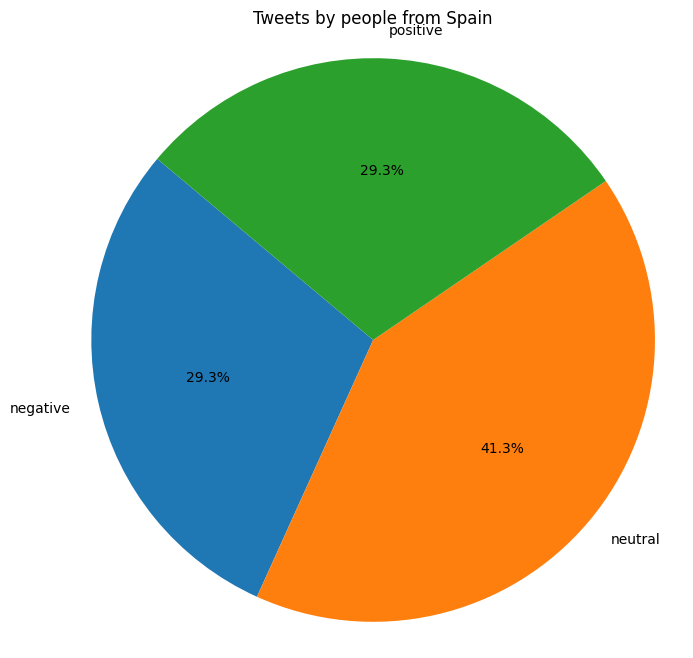

In [22]:
country.get_sentiment("Spain")

Además, podemos ver un gráfico de barras para comparar los países con más Tweets positivos, negativos o neutros. Por defecto nos muestra los negativos.

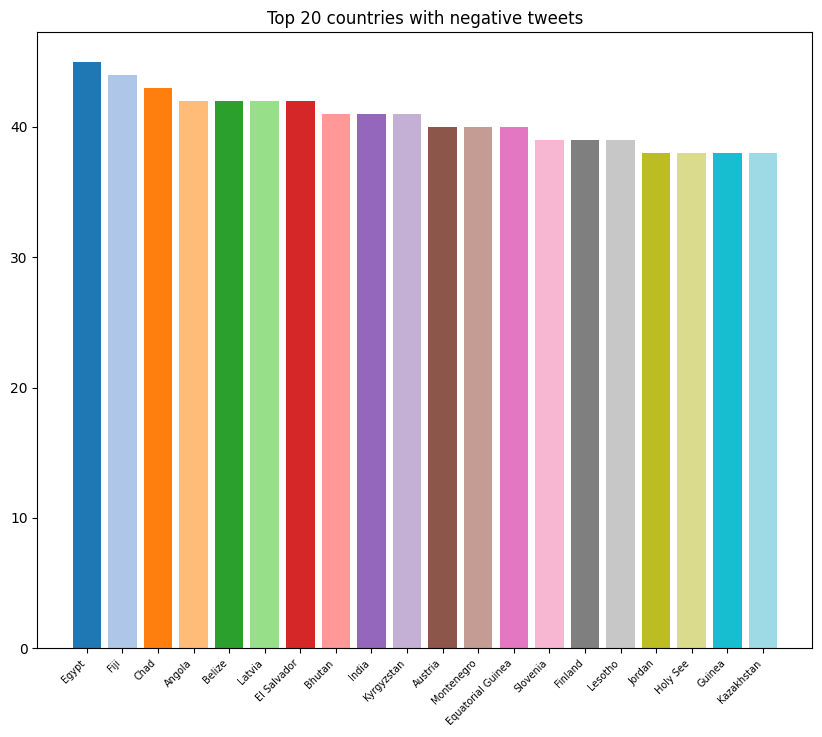

In [25]:
country.compare_sentiment()

Ahora obtendremos los datos por edad. Con get_positive() y get_negative() obtenemos el número de Tweets por rango y edad. Si no introducimos el rango correcto, nos da las opciones y nos pide de nuevo que introduzcamos un valor válido.

In [27]:
age = AgeAnalyzer(df)

In [28]:
age.get_positive("12-2")

Age range not available. Available ages are ['21-30', '31-45', '46-60', '70-100', '0-20', '60-70']. Try again.70-100
The are 1060 results with positive tweets with 70-100 years old


Con age_sentiment() podemos ver el porcentaje de cada sentimiento dentro de un rango válido de edad. Con compare_sentiment() podemos ver qué rango de edad postea más comentarios positivos, negativos o neutros, siendo "negativo" el sentimiento por defecto.

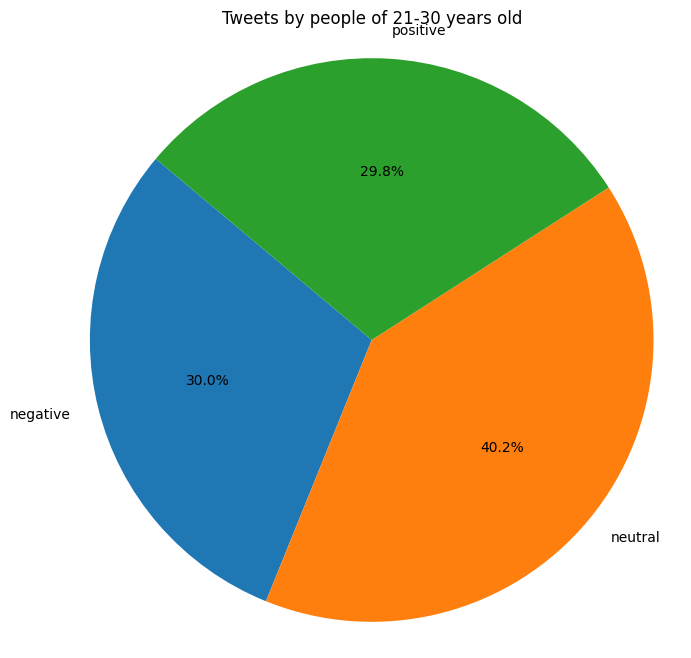

In [29]:
age.get_sentiment("21-30")

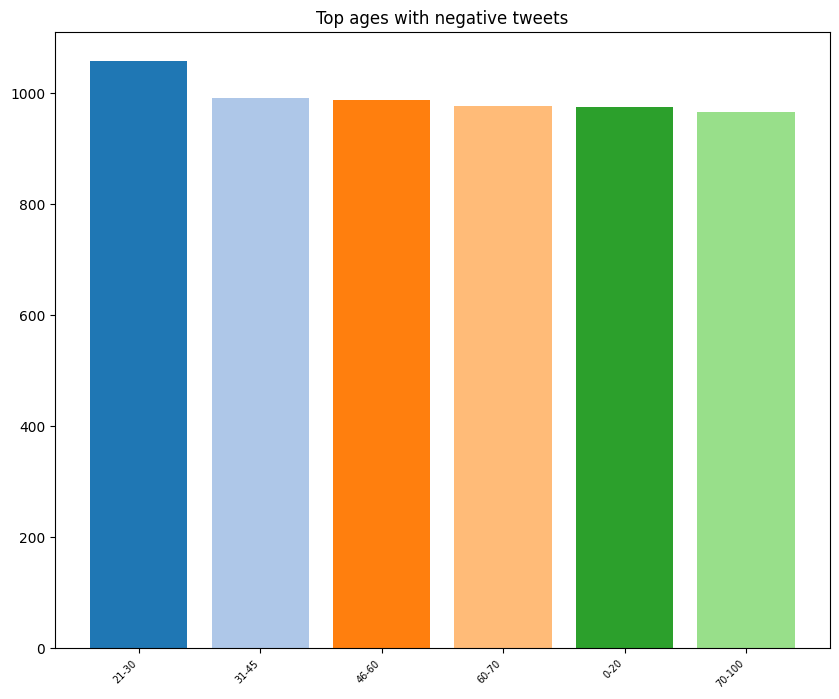

In [30]:
age.compare_sentiment()

Ahora usaremos la clase TimeAnalyzer para obtener la información del momento del día en el que se postean los Tweets. Podemos elegir un momento del día de los disponibles para saber cuántos hay positivos y negativos. De igual forma, con get_sentiment() podemos elegir un momento del día y ver a qué sentimiento se asocian la mayoría de Tweets que se subieron a esas horas. Esta información junto con la proporcionada sobre la edad y el país pueden ser relevantes para encontrar un patrón que re repita. Por ejemplo, hemos visto que los usuarios jóvenes son los que más comentarios negativos suben y el momento del día en el que más ocurre esto es por la tarde.

In [31]:
time = TimeAnalyzer(df)

In [33]:
time.get_positive("morning")

The are 2111 results with positive tweets during morning


In [34]:
time.get_negative("morning")

The are 1963 results with negative tweets during morning


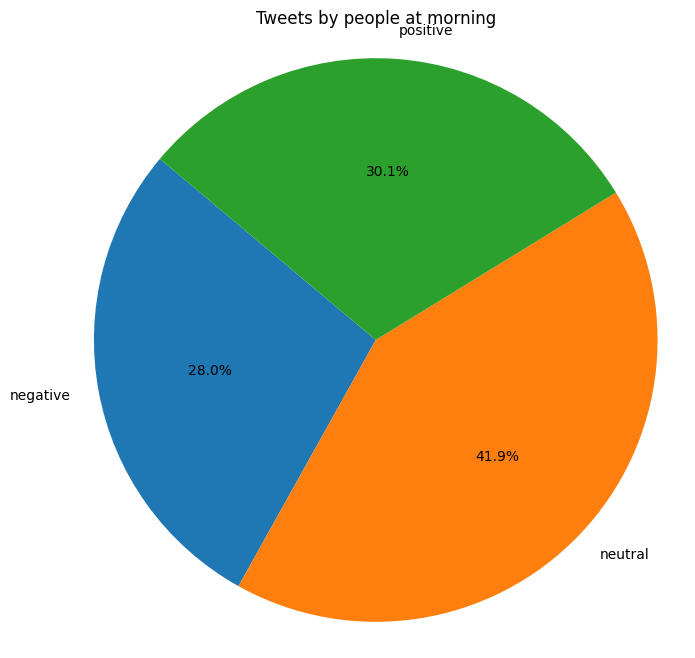

In [35]:
time.get_sentiment("morning")

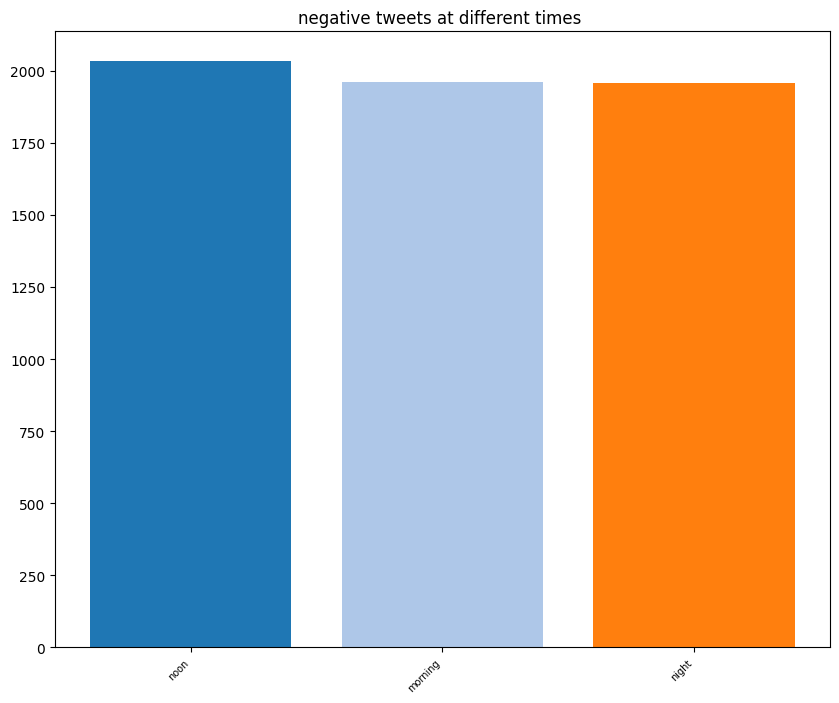

In [36]:
time.compare_sentiment()

También tenemos una clase para obtener más información sobre los Tweets: como su longitud media y qué sentimientos tienen Tweets más largos.

In [37]:
length = LengthAnalyzer(df)

In [38]:
length.get_positive()

The mean length of positive tweets is 65


In [39]:
length.get_negative()

The mean length of negative tweets is 65


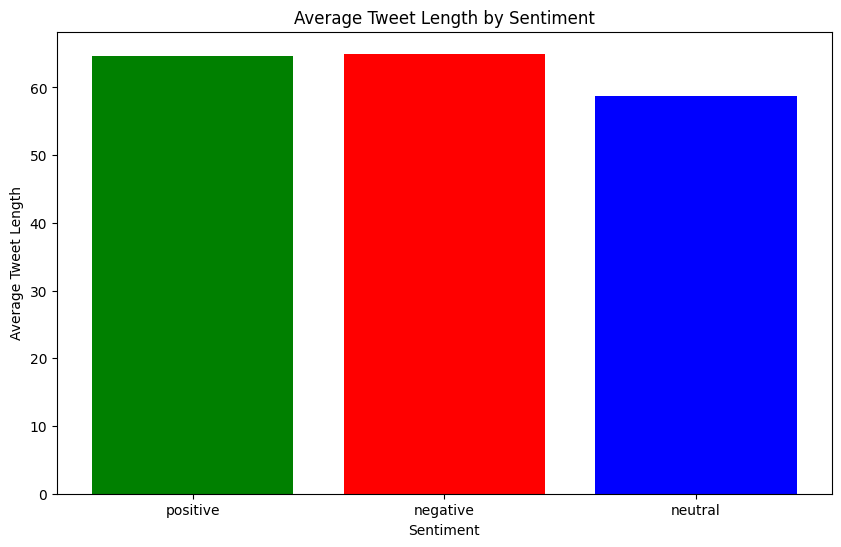

In [40]:
length.get_sentiment()

Todas estas clases son muy útiles y nos ayudan a obtener de manera más visual los datos que nos interesan sobre los usuarios y los propios comentarios. Sin embargo, puede que queramos saber directamente todos los datos sobre el perfil más frecuente entre los usuarios que escriben un tipo de comentario y para ello tenemos la clase SpecificDataAnalyzer.

In [41]:
specific = SpecificDataAnalyzer(df)

Podemos obtener los datos que más se repiten entre los Tweets negativos y los positivos: el país, la edad, el momento del día y el tamaño del Tweet.

In [42]:
specific.get_negative()

('Nauru', 'child', 'morning', 'short')


In [43]:
specific.get_positive()

('Croatia', 'senior', 'night', 'medium')


También podemos obtener cuáles son los perfiles que se repiten en los Tweets positivos, negativos y neutros, por si no queremos quedarnos solo con el primero. También podemos ver las veces que se repite cada combinación para compararlos.

In [44]:
specific.get_sentiment()

Negative information: 
    Country         Age    Time Length  Count Negative
      Nauru       child morning  short              16
     Bhutan young adult    noon medium              15
      Egypt       adult morning medium              15
El Salvador      senior    noon medium              15
     Greece       child morning medium              15
     Angola      senior    noon medium              14
     Cyprus young adult    noon medium              13
       Fiji      senior    noon medium              13
      India      senior   night  short              13
   Kiribati      senior   night  short              13

Positive information: 
                 Country         Age    Time Length  Count Positive
                 Croatia      senior   night medium              16
Czechia (Czech Republic)       adult   night medium              16
                Djibouti      senior   night medium              15
               Argentina       child morning medium              14
        

Tras visualizar los datos y analizarlos detenidamente, podemos empezar con los pasos específicos de NLP y análisis de sentimientos. Para empezar, vamos a usar una clase llamada AddData que nos creará directamente una tabla con datos nuevos y después nos la unirá a la nuestra. En este caso, no son muchos datos, pero es una prueba para ver cómo funcionaría en el caso de necesitar más vocabulario. Podría ser una buena opción en ocasiones en las que los datos sean escasos y necesitemos más vocabulario que podamos asociar a los sentimientos. En este caso, hemos elegido palabras muy marcadas para cada sentimiento.

In [47]:
from twitter_project.tokenizing_training.tokenizing import AddData, tokenize_text, tokenize_sentiment, words_filtered, get_wordcloud

In [48]:
add = AddData(df)

In [49]:
df2 = add.create_new_df()

In [50]:
df = add.concat_data(df2)

A continuación vamos a crear una bolsa de palabras para cada sentimiento. Tokenizaremos cada texto y después le pasaremos un filtro con palabras predefinidad y patrones asociados a etiquetas, páginas web o palabras muy cortas que no nos vayan a proporcionar nada de valor. Tras este filtrado, usaremos estas bolsas de palabras para crear un wordcloud de cada sentimiento. Así obtendremos de una forma original y visual las palabras más asociadas a cada sentimiento.

In [52]:
pos = tokenize_sentiment(df, "positive")

In [53]:
neg = tokenize_sentiment(df, "negative")

In [54]:
neu = tokenize_sentiment(df, "neutral")

In [55]:
cleaned_pos = words_filtered(pos)

In [56]:
cleaned_neg = words_filtered(neg)

In [57]:
cleaned_neu = words_filtered(neu)

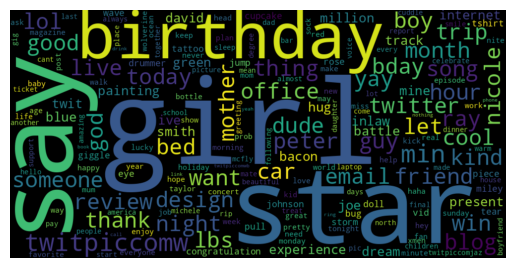

In [58]:
get_wordcloud(cleaned_pos)

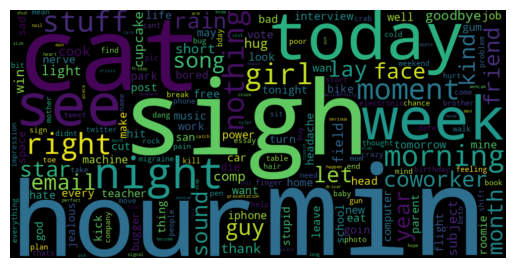

In [59]:
get_wordcloud(cleaned_neg)

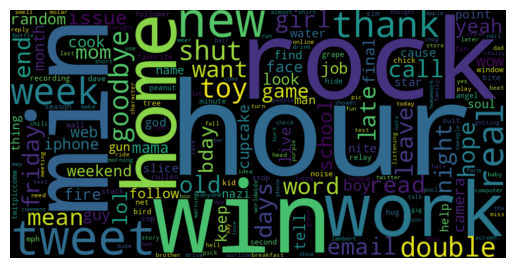

In [60]:
get_wordcloud(cleaned_neu)

In [61]:
from twitter_project.tokenizing_training.train_test import SentimentClassifier

PONERNOS CON LA PARTE DE TRAIN TEST Y DESPUÉS SIMILARITY
VOLVER A CORREGIR DESDE EL PRINCIPIO, AÑADIR MÁS TEXTO Y VER SI HACE FALTA MÁS CODIGO. DESPUÉS UML Y MEMORIA